In [64]:
import pyodbc
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads

import matplotlib.pyplot as plt

import folium

ModuleNotFoundError: No module named 'folium'

In [79]:
srv_name = "tst-skred.sql.nve.no"
db_name = "skredprod"
tbls = {"sh": "skred.SKREDHENDELSE",
        "ut": "skred.UTLOPUTLOSNINGOMR",
        "tek": "skred.SKREDTEKNISKEPARAMETRE"
        }


In [80]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=tst-skred.sql.nve.no;'
                      'Database=skredprod;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
cursor.execute('SELECT TOP (50) * FROM {0}'.format(tbls['sh']))

for row in cursor:
    print(row)


(1, '929784E8-81BD-4071-B3AA-1E1D66566F0C', 141, None, 'Tune / Isebakke', '1944-11-10 00:00:00.0000000', 'Ukjent nar pa dagen', '2000 m', None, 'Nei', 'Ukjent', 'Ukjent', 'Ukjent', 'Ukjent', 'Ukjent', 'Ukjent', 'Ukjent', 'Ukjent', 'Ukjent', 'Ja', 'Ukjent', 'Ukjent', 'Ja', None, None, None, None, None, None, None, 'NGI', 'Ulik kommune, Sarpsborg rett?', 'SkredObsHistorisk', 'Registrert og godkjent', None, 'Øyvind Høydal', '1005', None, None, None, None, 1, None, 587, 1, b'y\x7f\x00\x00\x01\x0cp\x04\x89\xe5s\x9f\x11A\x0cJ\xb2\xec\n\x05YA')
(2, 'D818D86D-6F49-45EF-985B-E863E7D5FE17', 120, None, None, None, '50 ar', '50000 m', None, 'Nei', 'Nei', 'Nei', 'Ukjent', 'Nei', 'Nei', 'Ukjent', 'Ukjent', 'Ukjent', 'Ukjent', 'Nei', 'Ja', 'Ukjent', 'Ukjent', None, None, None, None, None, None, None, 'NGI', 'Huge tsunami in Norw. and North Sea. Submarine slide in the Storegga ("great-edge") area on the continental shelf off the coast of Møre. The calendar year 6150 BC corresponds to a radiocarbon age

In [81]:
from_date = "2020-04-01"
to_date = "2020-04-30"

sh_q = """SELECT TOP 10 [skredID]
      ,[registrertDato]
      ,[regStatus]
      ,[skredTidspunkt]
      ,[noySkredTidspunkt]
      ,[skredtekniskeParam]
      ,[registrertAv]
      ,[registrertAvBrukerID]
      ,[skredType]
      ,[objektType]
      ,[SHAPE].STGeometryN(1).ToString() AS geometry
  FROM {db_name}.{db_tbl}
  -- WHERE [registrertDato] >= '2020-04-21' AND [registrertDato] < '2020-04-30' AND [registrertAv] = 'Sentinel-1' -- AND [regStatus]!='Slettet'
  WHERE [registrertAv] = 'Sentinel-1'
  ORDER BY [registrertDato] DESC
  """.format(db_name=db_name, db_tbl=tbls['sh'])

print(sh_q)

ut_q = """SELECT TOP 1 [skredID]
      ,[registrertDato]
      ,[regStatus]
      ,[registrertAv]
      ,[registrertAvBrukerID]
      ,[endretDato]
      ,[endretAv]
      ,[endretAvBrukerID]
      ,[rettighetsID]
      ,[SHAPE].STGeometryN(1).ToString() AS geometry
  FROM {db_name}.{db_tbl}
  --WHERE [registrertDato] >= '2019-08-22' AND [registrertDato] < '2019-08-30' AND [regStatus] = 'Godkjent kvalitet B'
  --WHERE [registrertDato] >= '2020-01-05' AND [registrertDato] < '2020-01-08'
  --WHERE [registrertDato] >= '2019-05-12' AND [registrertDato] < '2019-05-14' AND [registrertAv] = 'Sentinel-1'
  
  --WHERE [registrertDato] >= '2020-01-24' AND [registrertDato] < '2020-01-30' AND [registrertAv] = 'Sentinel-1'
  WHERE [registrertAv] = 'Sentinel-1' --AND [regStatus] = 'Godkjent kvalitet B'
  ORDER BY [registrertDato] DESC
  """.format(db_name=db_name, db_tbl=tbls['ut'])

print(ut_q)

SELECT TOP 10 [skredID]
      ,[registrertDato]
      ,[regStatus]
      ,[skredTidspunkt]
      ,[noySkredTidspunkt]
      ,[skredtekniskeParam]
      ,[registrertAv]
      ,[registrertAvBrukerID]
      ,[skredType]
      ,[objektType]
      ,[SHAPE].STGeometryN(1).ToString() AS geometry
  FROM skredprod.skred.SKREDHENDELSE
  -- WHERE [registrertDato] >= '2020-04-21' AND [registrertDato] < '2020-04-30' AND [registrertAv] = 'Sentinel-1' -- AND [regStatus]!='Slettet'
  WHERE [registrertAv] = 'Sentinel-1'
  ORDER BY [registrertDato] DESC
  
SELECT TOP 1 [skredID]
      ,[registrertDato]
      ,[regStatus]
      ,[registrertAv]
      ,[registrertAvBrukerID]
      ,[endretDato]
      ,[endretAv]
      ,[endretAvBrukerID]
      ,[rettighetsID]
      ,[SHAPE].STGeometryN(1).ToString() AS geometry
  FROM skredprod.skred.UTLOPUTLOSNINGOMR
  --WHERE [registrertDato] >= '2019-08-22' AND [registrertDato] < '2019-08-30' AND [regStatus] = 'Godkjent kvalitet B'
  --WHERE [registrertDato] >= '2020-01

In [82]:
df = pd.read_sql_query(ut_q, conn)

In [83]:
df

,skredID,registrertDato,regStatus,registrertAv,registrertAvBrukerID,endretDato,endretAv,endretAvBrukerID,rettighetsID,geometry
0,E3D86382-F1FB-44B6-AC92-06478C56E11F,2020-02-03 16:15:04.0000000,Godkjent kvalitet B,Sentinel-1,131@Sentinel 1,2020-02-03 16:15:04.0000000,Sentinel-1,131@Sentinel 1,1,"POLYGON ((706429.999942176 7686248.9996411577,..."


In [84]:
df['geometry']# = loads(df['SHAPE'])

0    POLYGON ((706429.999942176 7686248.9996411577,...
Name: geometry, dtype: object

In [85]:
epsg = 32633
#gdf = gpd.GeoDataFrame(df, geometry='geometry', crs={'init' :'epsg:' + str(epsg)})
gdf = gpd.GeoDataFrame(df, crs={'init' :'epsg:' + str(epsg)})
gdf

,skredID,registrertDato,regStatus,registrertAv,registrertAvBrukerID,endretDato,endretAv,endretAvBrukerID,rettighetsID,geometry
0,E3D86382-F1FB-44B6-AC92-06478C56E11F,2020-02-03 16:15:04.0000000,Godkjent kvalitet B,Sentinel-1,131@Sentinel 1,2020-02-03 16:15:04.0000000,Sentinel-1,131@Sentinel 1,1,"POLYGON ((706429.999942176 7686248.9996411577,..."


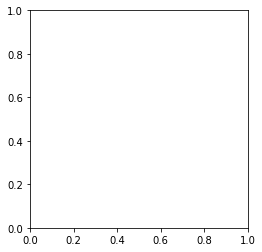

In [86]:
fig, ax = plt.subplots(1, 1)

gdf.plot(ax=ax, legend=True)

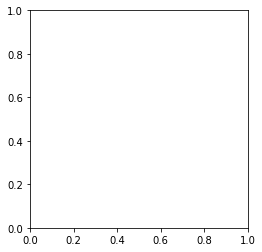

In [87]:
gdf.plot()